In [1]:
import pandas as pd
import numpy as np

### Creating objects to work with

In [2]:
index = pd.date_range('21/8/2020',periods=7)
s     = pd.Series(np.random.randn(5),index=['a','b','c','d','e'])
df    = pd.DataFrame(np.random.randn(7,3),index=index,columns=['A','B','C'])
long_series = pd.Series(np.random.randn(1000))

In [3]:
print(index)
print(s)
print(df)
print(long_series)

DatetimeIndex(['2020-08-21', '2020-08-22', '2020-08-23', '2020-08-24',
               '2020-08-25', '2020-08-26', '2020-08-27'],
              dtype='datetime64[ns]', freq='D')
a    0.179960
b   -0.397169
c    0.410221
d    0.304209
e    0.277543
dtype: float64
                   A         B         C
2020-08-21 -0.649620  0.484938 -0.082051
2020-08-22 -0.318482 -0.858453 -0.009209
2020-08-23  1.604205  2.451841  0.091108
2020-08-24  0.517628 -0.955578 -0.405685
2020-08-25  0.761923 -0.363588 -0.611454
2020-08-26  0.687859  2.737352 -0.089855
2020-08-27 -0.760327 -0.018870 -0.315966
0     -0.919997
1     -0.375830
2      1.215234
3     -0.474339
4     -0.321955
         ...   
995    1.791882
996   -0.450672
997    1.043877
998    1.560244
999   -0.825710
Length: 1000, dtype: float64


### Head and Tail

In [4]:
print(long_series.head()) # 5 is the default for both
print(long_series.tail())

0   -0.919997
1   -0.375830
2    1.215234
3   -0.474339
4   -0.321955
dtype: float64
995    1.791882
996   -0.450672
997    1.043877
998    1.560244
999   -0.825710
dtype: float64


In [5]:
print(long_series.head(20))
print(long_series.tail(10))

0    -0.919997
1    -0.375830
2     1.215234
3    -0.474339
4    -0.321955
5    -2.807274
6     0.024835
7     1.401783
8    -0.399864
9    -1.772602
10    0.062845
11    0.159256
12   -1.142840
13    1.961205
14    0.166226
15    0.712197
16   -0.372515
17   -0.540223
18   -0.387670
19    1.826560
dtype: float64
990   -0.914344
991   -0.032237
992   -0.174804
993   -0.427345
994   -1.164029
995    1.791882
996   -0.450672
997    1.043877
998    1.560244
999   -0.825710
dtype: float64


### List Comprehensions

In [6]:
df.columns = [x.lower().strip() for x in df.columns]
print(list(df.columns))

['a', 'b', 'c']


### Numpy with series objects

In [7]:
print(s.array)

<PandasArray>
[   0.179959599172829, -0.39716871228519135,  0.41022051860297726,
   0.3042085069286953,  0.27754333391148756]
Length: 5, dtype: float64


In [8]:
print(s.index.array)

<PandasArray>
['a', 'b', 'c', 'd', 'e']
Length: 5, dtype: object


In [9]:
np.asarray(index.to_numpy)

array(<bound method IndexOpsMixin.to_numpy of DatetimeIndex(['2020-08-21', '2020-08-22', '2020-08-23', '2020-08-24',
               '2020-08-25', '2020-08-26', '2020-08-27'],
              dtype='datetime64[ns]', freq='D')>, dtype=object)

In [10]:
s.values

array([ 0.1799596 , -0.39716871,  0.41022052,  0.30420851,  0.27754333])

#### Datetime Objects

In [11]:
ser = index.to_numpy(dtype='datetime64[ns]')
ser

array(['2020-08-21T00:00:00.000000000', '2020-08-22T00:00:00.000000000',
       '2020-08-23T00:00:00.000000000', '2020-08-24T00:00:00.000000000',
       '2020-08-25T00:00:00.000000000', '2020-08-26T00:00:00.000000000',
       '2020-08-27T00:00:00.000000000'], dtype='datetime64[ns]')

>
<
*
+
-
/
//
**

## Binary Operations

In [12]:
df = pd.DataFrame(
    {
   'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
   'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
   'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])
    }
)
print(df)

        one       two     three
a  0.923705 -0.104556       NaN
b  1.030403 -1.072884  0.285801
c  0.504314 -0.439979 -0.842271
d       NaN -1.646953 -1.345684


In [13]:
# sub() subtraction
row = df.iloc[1]

In [14]:
df.sub(row , axis='columns')

,one,two,three
a,-0.106697,0.968328,NaN
b,0.000000,0.000000,0.000000
c,-0.526089,0.632905,-1.128071
d,NaN,-0.574069,-1.631485


In [15]:
df.sub(row , axis=1)

,one,two,three
a,-0.106697,0.968328,NaN
b,0.000000,0.000000,0.000000
c,-0.526089,0.632905,-1.128071
d,NaN,-0.574069,-1.631485


In [16]:
column = df['two']

In [17]:
df.sub(column , axis='index')

,one,two,three
a,1.028262,0.0,NaN
b,2.103287,0.0,1.358685
c,0.944293,0.0,-0.402292
d,NaN,0.0,0.301268


In [18]:
dfmi = df.copy()

In [19]:
dfmi.index = pd.MultiIndex.from_tuples(
    [(1, 'a'), (1, 'b'),
    (1, 'c'), (2, 'a')],
    names=['first', 'second']
)
dfmi

one       two     three
first second                              
1     a       0.923705 -0.104556       NaN
      b       1.030403 -1.072884  0.285801
      c       0.504314 -0.439979 -0.842271
2     a            NaN -1.646953 -1.345684

In [20]:
dev = pd.Series(np.arange(11))
div, rem = divmod(dev , 5)
print(div)
print(rem)

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    2
dtype: int32
0     0
1     1
2     2
3     3
4     4
5     0
6     1
7     2
8     3
9     4
10    0
dtype: int32


In [21]:
# u can also do this element wise
div , rem = divmod(dev , [2,4,6,8,10,12,14,16,18,20,22])
print(div)
print(rem)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int32
0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
dtype: int32


## Missing data

In [22]:
df = pd.DataFrame({'one':[1,2,3,4,6,5,6,np.nan],'two':[1,6,3,4,np.nan,5,6,np.nan],'three':[1,3,np.nan,6,5,np.nan,2 ,np.nan]})
df2 = pd.DataFrame({'one':[1,0,3,4,np.nan,5,6,np.nan],'two':[np.nan,6,4,4,np.nan,5,6,np.nan],'three':[1,3,np.nan,6,5,np.nan,2 ,np.nan]})

In [23]:
df

,one,two,three
0,1.0,1.0,1.0
1,2.0,6.0,3.0
2,3.0,3.0,NaN
3,4.0,4.0,6.0
4,6.0,NaN,5.0
5,5.0,5.0,NaN
6,6.0,6.0,2.0
7,NaN,NaN,NaN


In [24]:
df2

,one,two,three
0,1.0,NaN,1.0
1,0.0,6.0,3.0
2,3.0,4.0,NaN
3,4.0,4.0,6.0
4,NaN,NaN,5.0
5,5.0,5.0,NaN
6,6.0,6.0,2.0
7,NaN,NaN,NaN


In [25]:
df + df2

,one,two,three
0,2.0,NaN,2.0
1,2.0,12.0,6.0
2,6.0,7.0,NaN
3,8.0,8.0,12.0
4,NaN,NaN,10.0
5,10.0,10.0,NaN
6,12.0,12.0,4.0
7,NaN,NaN,NaN


In [26]:
df.add(df2)

,one,two,three
0,2.0,NaN,2.0
1,2.0,12.0,6.0
2,6.0,7.0,NaN
3,8.0,8.0,12.0
4,NaN,NaN,10.0
5,10.0,10.0,NaN
6,12.0,12.0,4.0
7,NaN,NaN,NaN


In [27]:
df.add(df2 , fill_value = 0 )

,one,two,three
0,2.0,1.0,2.0
1,2.0,12.0,6.0
2,6.0,7.0,NaN
3,8.0,8.0,12.0
4,6.0,NaN,10.0
5,10.0,10.0,NaN
6,12.0,12.0,4.0
7,NaN,NaN,NaN


## Flexible Comparisons

In [28]:
df['one'] == 2.0

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
Name: one, dtype: bool

In [29]:
df.eq(2.0)

,one,two,three
0,False,False,False
1,True,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,True
7,False,False,False


In [30]:
df['one'].eq(2.0)

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
Name: one, dtype: bool

In [31]:
v = df['one'].eq(2.0)
print(df[v])

   one  two  three
1  2.0  6.0    3.0


## Boolean reductions

In [32]:
( df < 9.0 ).all()

one      False
two      False
three    False
dtype: bool

In [33]:
(df > 2.0).any()

one      True
two      True
three    True
dtype: bool

In [34]:
df.empty

False

In [35]:
pd.DataFrame(columns=list('ABC')).empty

True

## Comparing if objects are eqivalentt 

In [36]:
df + df == df * 2

,one,two,three
0,True,True,True
1,True,True,True
2,True,True,False
3,True,True,True
4,True,False,True
5,True,True,False
6,True,True,True
7,False,False,False


In [37]:
(df + df).equals(df * 2)

True

## Comparing arrrays as objects

In [38]:
# DOING ELEMENT WISE COMPARISONS 

In [39]:
pd.Series(['foo','bar','baz']) == 'foo'

0     True
1    False
2    False
dtype: bool

In [40]:
pd.Series(['foo','bar','baz']) == pd.Index(['foo','bar','boz'])

0     True
1     True
2    False
dtype: bool

In [41]:
np.array([1, 2, 3]) == np.array([2,2,3])

array([False,  True,  True])

In [42]:
# whenever i have a nan i will replace it with a value in other dataset
df1 = pd.DataFrame({'A': [1., np.nan, 3., 5., np.nan],
                    'B': [np.nan, 2., 3., np.nan, 6.]})

df2 = pd.DataFrame({'A': [5., 2., 4., np.nan, 3., 7.],
              'B': [np.nan, np.nan, 3., 4., 6., 8.]})
df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [43]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,8.0


# Descriptive statistics

In [44]:
df.mean()

one      3.857143
two      4.166667
three    3.400000
dtype: float64

In [45]:
df.mean(skipna=True)

one      3.857143
two      4.166667
three    3.400000
dtype: float64

In [46]:
df.mean(skipna=False)

one     NaN
two     NaN
three   NaN
dtype: float64

In [47]:
'''
    standard deviation means
    a quantity expressing by how much the members 
    of a group differ from the mean value for the group.
    
'''
df.std()

one      1.951800
two      1.940790
three    2.073644
dtype: float64

In [48]:
ts_stand = ( df - df.mean()) / df.std()
ts_stand

,one,two,three
0,-1.463850,-1.631638,-1.157383
1,-0.951503,0.944632,-0.192897
2,-0.439155,-0.601130,NaN
3,0.073193,-0.085876,1.253831
4,1.097888,NaN,0.771589
5,0.585540,0.429378,NaN
6,1.097888,0.944632,-0.675140
7,NaN,NaN,NaN


In [49]:
ts_stand.std()

one      1.0
two      1.0
three    1.0
dtype: float64

In [50]:
df.cumsum()

,one,two,three
0,1.0,1.0,1.0
1,3.0,7.0,4.0
2,6.0,10.0,NaN
3,10.0,14.0,10.0
4,16.0,NaN,15.0
5,21.0,19.0,NaN
6,27.0,25.0,17.0
7,NaN,NaN,NaN


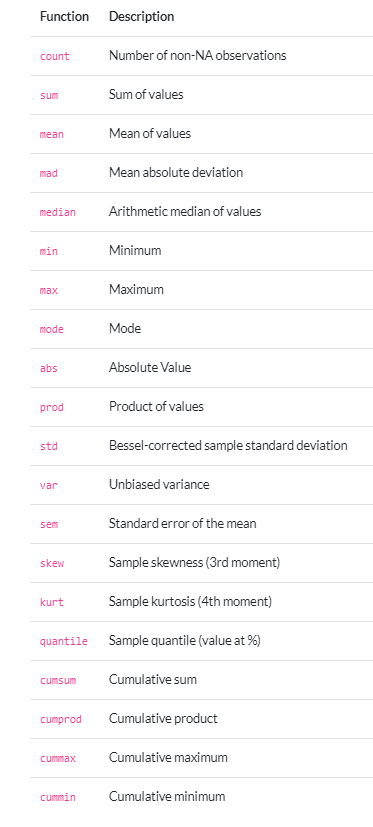

#### Note that by chance some NumPy methods, like mean, std, and sum, will exclude NAs on Series input by default:

Series.nunique() will return the number of unique non-NA values in a Series:

In [51]:
series = pd.Series(np.random.randn(500))
series[20:500] = np.nan
series[10:20] = 5

series.nunique()

11

### Sumaarizing Data

In [52]:
series = pd.Series(np.random.randn(1000))

In [53]:
series.describe()

count    1000.000000
mean        0.061352
std         1.001310
min        -2.784215
25%        -0.613496
50%         0.036518
75%         0.732914
max         3.977922
dtype: float64

In [54]:
frame = pd.DataFrame(np.random.randn(1000, 5),columns=['a', 'b', 'c', 'd', 'e'])

In [55]:
frame.describe()

,a,b,c,d,e
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012404,0.003998,-0.045788,-0.026435,0.019872
std,1.009334,0.985967,0.980227,1.006499,1.000179
min,-2.775338,-2.973104,-2.901194,-3.809043,-2.917908
25%,-0.683759,-0.683320,-0.731068,-0.712504,-0.676207
50%,-0.008104,-0.033166,-0.042808,-0.020133,0.021443
75%,0.731195,0.647707,0.638588,0.686740,0.713715
max,3.826716,3.389034,3.280714,2.522425,3.311469


In [56]:
series.describe(percentiles=[.05, .25, .75, .95])
# new row 5% added

count    1000.000000
mean        0.061352
std         1.001310
min        -2.784215
5%         -1.602921
25%        -0.613496
50%         0.036518
75%         0.732914
95%         1.735949
max         3.977922
dtype: float64

In [57]:
s = pd.Series(['a', 'a', 'b', 'b', 'a', 'a', np.nan, 'c', 'd', 'a'])
s.describe()

# Note that on a mixed-type DataFrame object, describe() will restrict the summary to include only numerical columns or
#, if none are, only categorical columns:

count     9
unique    4
top       a
freq      5
dtype: object

In [58]:
frame = pd.DataFrame({'a': ['Yes', 'Yes', 'No', 'No'], 'b': range(4)})
frame.describe(include=['object'])

,a
count,4
unique,2
top,Yes
freq,2


In [59]:
frame.describe(include=['number'])

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [60]:
frame.describe(include='all')

,a,b
count,4,4.000000
unique,2,NaN
top,Yes,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


## Index of min/max valuesÂ¶


In [61]:
s1 = pd.Series(np.random.randn(5))
s1

0   -1.257336
1   -0.312050
2   -0.817030
3    1.047653
4    0.463095
dtype: float64

In [62]:
s1.idxmin() ,s1.idxmax()

(0, 3)

In [63]:
df1 = pd.DataFrame(np.random.randn(5, 3), columns=['A', 'B', 'C'])
df1

,A,B,C
0,-1.604424,1.084130,0.326161
1,-1.331727,0.824485,-0.093115
2,0.607890,-0.337348,0.724738
3,-0.366101,-0.134522,-0.273637
4,0.032570,0.468643,-0.297648


In [64]:
df1.idxmin(axis=0)

A    0
B    2
C    4
dtype: int64

In [65]:
df1.idxmin(axis=1)

0    A
1    A
2    B
3    A
4    C
dtype: object

## Value Counts 

In [66]:
data = pd.Series(np.random.randint(0, 7, size=50))
data

0     4
1     3
2     5
3     6
4     0
5     5
6     6
7     4
8     2
9     3
10    4
11    2
12    1
13    2
14    3
15    6
16    6
17    4
18    5
19    5
20    4
21    3
22    4
23    2
24    0
25    3
26    0
27    0
28    1
29    3
30    6
31    5
32    4
33    4
34    3
35    2
36    0
37    1
38    6
39    2
40    5
41    2
42    3
43    4
44    6
45    2
46    2
47    3
48    0
49    1
dtype: int32

In [67]:
pd.value_counts(data)

4    9
3    9
2    9
6    7
5    6
0    6
1    4
dtype: int64

In [68]:
pd.value_counts(data).sum()

50

In [69]:
fdata = pd.DataFrame({"a": [1, 2, 3, 4], "b": ["x", "x", "y", "y"]})
fdata.value_counts()

a  b
4  y    1
3  y    1
2  x    1
1  x    1
dtype: int64

## Reindexing and altering labelsÂ¶
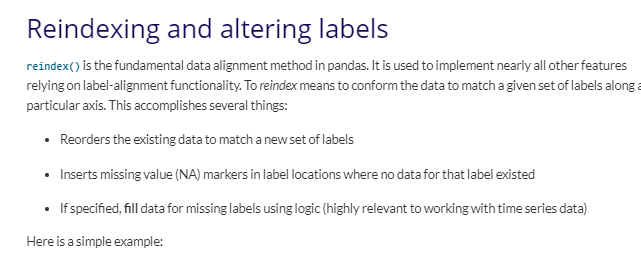

In [70]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    1.045784
b   -1.840719
c    0.561405
d    0.076965
e    0.196442
dtype: float64

In [71]:
s.reindex(['e','b','f','d'])
# Here, the f label was not contained in the  
# Series and hence appears as NaN in the result.

e    0.196442
b   -1.840719
f         NaN
d    0.076965
dtype: float64